In [25]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [26]:
data = pd.read_csv('Students Form.csv')
del data['Timestamp']
data

,Age,Gender,Major,Graduation Year,Did you register for this event prior to attending?,"Before attending this event, how much did you know about Deloitte ?","After attending this event, how much do you know about Deloitte?",What was your goal for attending the event?,Were you able to achieve these goals?,Which of the videos shown resonated with you most?,What part of the presentation interested you most?,What would you have liked to see more of in the presentation?,Which games interested you the most and why?,"After attending this presentation, how would you describe Deloitte in two words?"
0,NaN,Female,Chemical engineering,2023-2024,No,3,4,Employment Opportunities,Yes,Deloitte in Two Words,Services and Industries,Internships and interviews stories,Images,Dream and future
1,20.0,Male,Civil and Environmental Engineering,2024,Yes,4,5,Employment Opportunities,Yes,Your Future at Deloitte,Services and Industries,Recruitment process,CV,Good Impact
2,21.0,Female,Masters in finance,2023,Yes,3,5,Employment Opportunities,No,Deloitte in Two Words;Your Future at Deloitte,Services and Industries,Employment benefits,Resume,Diversity & consistent
3,20.0,Female,Finance,2023,Yes,4,5,Networking,Yes,Deloitte in Two Words,Why Deloitte?,The presentation was on perfect,Counting the numbers,Inspiring and growing
4,20.0,Female,Economics,2022,Yes,3,5,Employment Opportunities,No,Your Future at Deloitte,About Deloitte,Employment details,CV board,Impact and empowerment
5,20.0,Male,CCE,2024,Yes,2,4,Information about Deloitte,Yes,Your Future at Deloitte,Why Deloitte?,internships,cv,professionally growing
6,27.0,Female,Masters in Chemical Engineering,2024,No,2,4,Information about Deloitte,Yes,Deloitte in Two Words;Company's History;Your F...,Why Deloitte?,Types of opportunities,All,Constantly improving
7,19.0,Male,Business Administration,2023,Yes,4,4,Employment Opportunities,Yes,Deloitte in Two Words;Your Future at Deloitte,Services and Industries,Opportunities,Cv,Amazing experience
8,22.0,Male,Economics and finance,2023,Yes,3,5,Employment Opportunities,No,Deloitte in Two Words,Services and Industries,Recruitment process,.,.
9,24.0,Female,Chemical engineering,2023,Yes,3,4,Networking,Yes,Company's History,About Deloitte,Steps of recruitment,1-10 game,Looks for the future


In [27]:
data.isnull().sum()

Age                                                                                  2
Gender                                                                               0
Major                                                                                0
Graduation Year                                                                      0
Did you register for this event prior to attending?                                  0
Before attending this event, how much did you know about Deloitte ?                  0
After attending this event, how much do you know about Deloitte?                     0
What was your goal for attending the event?                                          0
Were you able to achieve these goals?                                                0
Which of the videos shown resonated with you most?                                   0
What part of the presentation interested you most?                                   0
What would you have liked to see more of in

In [28]:
data = data.dropna()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1 to 35
Data columns (total 14 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Age                                                                                33 non-null     float64
 1   Gender                                                                             33 non-null     object 
 2   Major                                                                              33 non-null     object 
 3   Graduation Year                                                                    33 non-null     object 
 4   Did you register for this event prior to attending?                                33 non-null     object 
 5   Before attending this event, how much did you know about Deloitte ?                33 non-null     int64  
 

In [30]:
data['Age'] = data['Age'].astype(int)

C:\Users\marit\AppData\Local\Temp\ipykernel_12636\2794939974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].astype(int)


In [31]:
for column in data.columns:
    if data[column].dtypes == 'O':
        data[column] = data[column].map(str.lower)
        data[column] = data[column].str.strip()

C:\Users\marit\AppData\Local\Temp\ipykernel_12636\4216383559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].map(str.lower)
C:\Users\marit\AppData\Local\Temp\ipykernel_12636\4216383559.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].str.strip()


In [32]:
data.loc[data['Major'].str.contains('business'), 'Major'] = 'business'
data.loc[data['Major'].str.contains('accounting'), 'Major'] = 'business'
data.loc[data['Major'].str.contains('engineer'), 'Major'] = 'engineering'
data.loc[data['Major'].str.contains('finance'), 'Major'] = 'finance'
data.loc[data['Major'].str.contains('energy studies'), 'Major'] = 'energy studies'
data['Major'].replace('cce', 'engineering', inplace = True)

C:\Users\marit\AppData\Local\Temp\ipykernel_12636\1375381342.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Major'].replace('cce', 'engineering', inplace = True)


In [33]:
data['Major'] = data['Major'].replace(['engineering', 'finance', 'economics', 'business',
       'food science and management', 'energy studies',
       'computer science'] , [1, 2, 3, 4, 5, 6, 7])

C:\Users\marit\AppData\Local\Temp\ipykernel_12636\4173976498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Major'] = data['Major'].replace(['engineering', 'finance', 'economics', 'business',


In [34]:
data['What was your goal for attending the event? '] = data['What was your goal for attending the event? '].replace(['employment opportunities', 'networking',
       'information about deloitte'], [1, 2, 3])

C:\Users\marit\AppData\Local\Temp\ipykernel_12636\1932857122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['What was your goal for attending the event? '] = data['What was your goal for attending the event? '].replace(['employment opportunities', 'networking',


In [36]:
data['What part of the presentation interested you most? '] = data['What part of the presentation interested you most? '].replace(['services and industries', 'why deloitte?', 'about deloitte',
       "company's history"], [1, 2, 3, 4])

C:\Users\marit\AppData\Local\Temp\ipykernel_12636\2921248888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['What part of the presentation interested you most? '] = data['What part of the presentation interested you most? '].replace(['services and industries', 'why deloitte?', 'about deloitte',


In [37]:
data['Gender'] = data['Gender'].replace(['female', 'male'], [1, 2])

C:\Users\marit\AppData\Local\Temp\ipykernel_12636\3967628691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = data['Gender'].replace(['female', 'male'], [1, 2])


In [38]:
data['Were you able to achieve these goals?'] = data['Were you able to achieve these goals?'].replace(['yes', 'no'], [1, 2])

C:\Users\marit\AppData\Local\Temp\ipykernel_12636\489739371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Were you able to achieve these goals?'] = data['Were you able to achieve these goals?'].replace(['yes', 'no'], [1, 2])


In [39]:
data['Did you register for this event prior to attending? '] = data['Did you register for this event prior to attending? '].replace(['yes', 'no'], [1, 2])

C:\Users\marit\AppData\Local\Temp\ipykernel_12636\3951355641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Did you register for this event prior to attending? '] = data['Did you register for this event prior to attending? '].replace(['yes', 'no'], [1, 2])


In [40]:
data['Which of the videos shown resonated with you most? '] = data['Which of the videos shown resonated with you most? '].replace(['deloitte in two words', 'your future at deloitte',
       "deloitte in two words;your future at deloitte",
       "deloitte in two words;company's history;your future at deloitte",
       "company's history"], [1, 2, 3, 4, 5])

C:\Users\marit\AppData\Local\Temp\ipykernel_12636\1492799159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Which of the videos shown resonated with you most? '] = data['Which of the videos shown resonated with you most? '].replace(['deloitte in two words', 'your future at deloitte',


In [42]:
data['Graduation Year'] = data['Graduation Year'].replace('2023-2024', '2024')
data['Graduation Year'] = data['Graduation Year'].replace('spring 2023', '2023')
data['Graduation Year'] = data['Graduation Year'].replace('december 2023', '2023')
data['Graduation Year'] = data['Graduation Year'].replace('22-23', '2023')

data['Graduation Year'] = data['Graduation Year'].astype(int)

C:\Users\marit\AppData\Local\Temp\ipykernel_12636\1447091304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Graduation Year'] = data['Graduation Year'].replace('2023-2024', '2024')
C:\Users\marit\AppData\Local\Temp\ipykernel_12636\1447091304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Graduation Year'] = data['Graduation Year'].replace('spring 2023', '2023')
C:\Users\marit\AppData\Local\Temp\ipykernel_12636\1447091304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a c

In [43]:
data

,Age,Gender,Major,Graduation Year,Did you register for this event prior to attending?,"Before attending this event, how much did you know about Deloitte ?","After attending this event, how much do you know about Deloitte?",What was your goal for attending the event?,Were you able to achieve these goals?,Which of the videos shown resonated with you most?,What part of the presentation interested you most?,What would you have liked to see more of in the presentation?,Which games interested you the most and why?,"After attending this presentation, how would you describe Deloitte in two words?"
1,20,2,1,2024,1,4,5,1,1,2,1,recruitment process,cv,good impact
2,21,1,2,2023,1,3,5,1,2,3,1,employment benefits,resume,diversity & consistent
3,20,1,2,2023,1,4,5,2,1,1,2,the presentation was on perfect,counting the numbers,inspiring and growing
4,20,1,3,2022,1,3,5,1,2,2,3,employment details,cv board,impact and empowerment
5,20,2,1,2024,1,2,4,3,1,2,2,internships,cv,professionally growing
6,27,1,1,2024,2,2,4,3,1,4,2,types of opportunities,all,constantly improving
7,19,2,4,2023,1,4,4,1,1,3,1,opportunities,cv,amazing experience
8,22,2,2,2023,1,3,5,1,2,1,1,recruitment process,.,.
9,24,1,1,2023,1,3,4,2,1,5,3,steps of recruitment,1-10 game,looks for the future
10,22,1,4,2023,1,2,4,3,1,1,2,marketing services,counting from 1 to 10,diversity and innovation


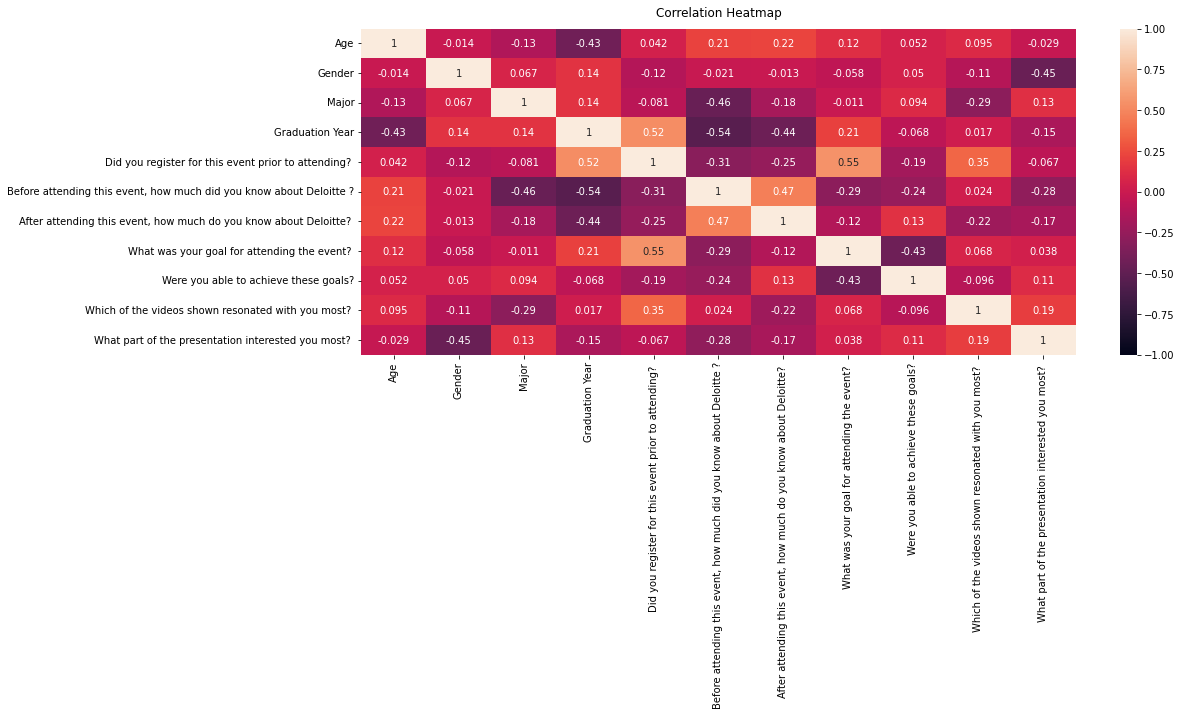

In [44]:
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [45]:
data.describe()

,Age,Gender,Major,Graduation Year,Did you register for this event prior to attending?,"Before attending this event, how much did you know about Deloitte ?","After attending this event, how much do you know about Deloitte?",What was your goal for attending the event?,Were you able to achieve these goals?,Which of the videos shown resonated with you most?,What part of the presentation interested you most?
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,21.030303,1.515152,2.818182,2023.333333,1.090909,2.787879,4.363636,1.575758,1.272727,2.303030,1.848485
std,2.311450,0.507519,1.927669,1.020621,0.291937,1.166125,0.895062,0.830298,0.452267,1.237054,0.870388
min,18.000000,1.000000,1.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,20.000000,1.000000,1.000000,2023.000000,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000
50%,20.000000,2.000000,2.000000,2023.000000,1.000000,3.000000,5.000000,1.000000,1.000000,2.000000,2.000000
75%,22.000000,2.000000,4.000000,2024.000000,1.000000,4.000000,5.000000,2.000000,2.000000,3.000000,2.000000
max,27.000000,2.000000,7.000000,2026.000000,2.000000,5.000000,5.000000,3.000000,2.000000,5.000000,4.000000


In [46]:
def feedback(column):
    comment_words = ''
    stopwords = set(STOPWORDS)
    # iterate through the csv file
    for val in data[column]:
     
        # typecaste each val to string
        val = str(val)
 
        # split the value
        tokens = val.split()
     
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
     
        comment_words += " ".join(tokens)+" "
 


        wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
        # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
 
    plt.show()

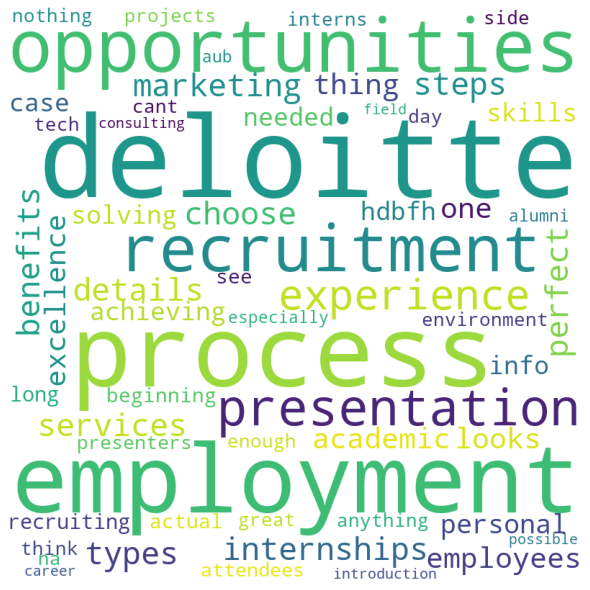

In [47]:
feedback('What would you have liked to see more of in the presentation? ')

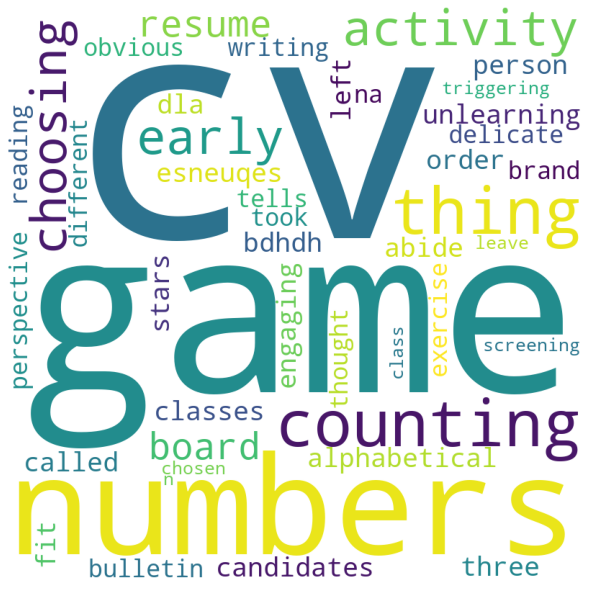

In [48]:
feedback('Which games interested you the most and why?')

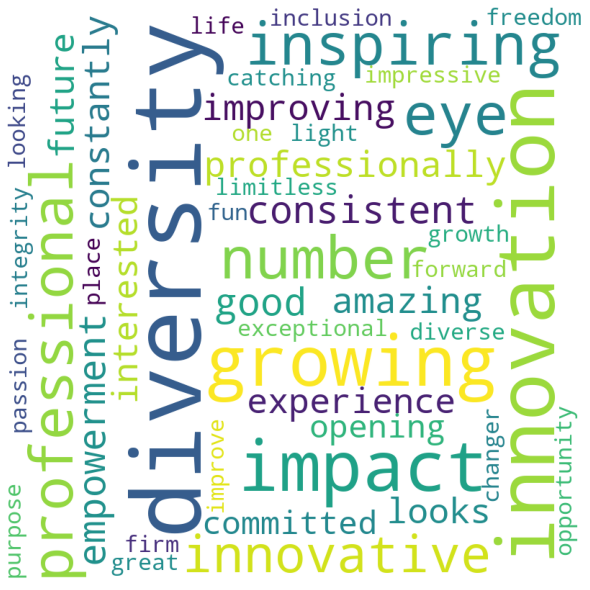

In [49]:
feedback('After attending this presentation, how would you describe Deloitte in two words? ')